>**Exploratory Data Analysis and Decision Tree Modeling for Pima Indian Diabetes Dataset**


**Kelompok 12**
*   Nurcinta Asih  (2106140)
*   Wahyu Bunyamin (2106064)

Data set dari kagel merupakan data Pima Indian Diabet dari Kaggle
(https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

dengan atribut
*   Pregnancies(Kehamilan)
*   Glucose(Glukosa)
*   BloodPressure(Tekanan darah)
*   SkinThickness(Ketebalan Kulit)
*   Insulin(Insulin)
*   BMI(Body Mass Index)
*   DiabetesPedigreeFunction(Fungsi Silsilah Diabetes)
*   Age(Usia)
*   Outcome(Hasil)

In [ ]:
#Library
import numpy as np                #Fungsi Array
import pandas as pd               #Pengolahan data (Pemanggilan datam hapus kolom dll)
import matplotlib.pyplot as plt   #Visualisai data
import seaborn as sns
import scipy as sp                #Algoritma Matematika

In [ ]:
#Mengimport data
datmin = pd.read_csv('/content/diabetes.csv',sep=";")
datmin.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#EDA (Exploratory Data Analysis)

In [ ]:
#Mengecek Tipe Data
datmin.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
datmin.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


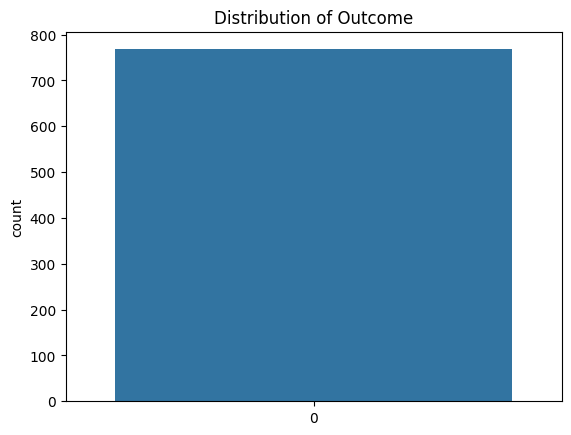

In [ ]:
# Menggambarkan diagram batang distribusi Outcome
sns.countplot(datmin['Outcome']).set_title('Distribution of Outcome')
plt.show()

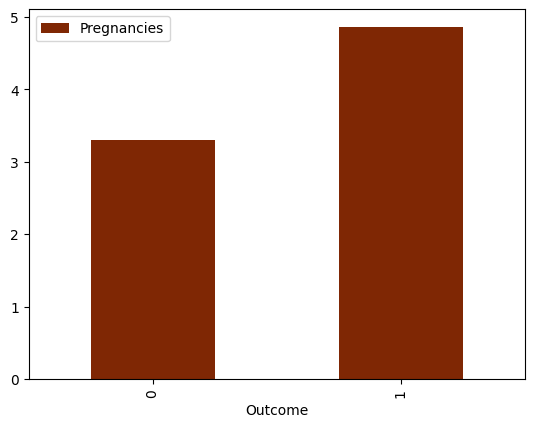

In [ ]:
# Menggambarkan diagram batang rata-rata Pregnancies berdasarkan Outcome
q1 = datmin.groupby('Outcome')['Pregnancies'].mean().reset_index()
q1.plot.bar(x='Outcome', y='Pregnancies', colormap='Oranges_r')
plt.show()

# Skewness

In [ ]:
datatr=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
datmin[datatr].skew(axis=0, skipna=True)

Glucose          0.173754
BloodPressure   -1.843608
SkinThickness    0.109372
Insulin          2.272251
BMI             -0.428982
dtype: float64

In [ ]:
df1=datmin.loc[datmin['Outcome']==0]
df2=datmin.loc[datmin['Outcome']==1]

In [ ]:
df1[datatr].skew(axis=0, skipna=True)

Glucose          0.173111
BloodPressure   -1.809825
SkinThickness    0.031155
Insulin          2.498741
BMI             -0.665902
dtype: float64

In [ ]:
df2[datatr].skew(axis=0, skipna=True)

Glucose         -0.495557
BloodPressure   -1.943633
SkinThickness    0.115910
Insulin          1.843831
BMI              0.000597
dtype: float64

In [ ]:
df1[datatr].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,500.0000,500.000000,500.000000,500.000000,500.000000
mean,109.9800,68.184000,19.664000,68.792000,30.304200
std,26.1412,18.063075,14.889947,98.865289,7.689855
min,0.0000,0.000000,0.000000,0.000000,0.000000
25%,93.0000,62.000000,0.000000,0.000000,25.400000
50%,107.0000,70.000000,21.000000,39.000000,30.050000
75%,125.0000,78.000000,31.000000,105.000000,35.300000
max,197.0000,122.000000,60.000000,744.000000,57.300000


In [ ]:
df2[datatr].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,141.257463,70.824627,22.164179,100.335821,35.142537
std,31.939622,21.491812,17.679711,138.689125,7.262967
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,119.000000,66.000000,0.000000,0.000000,30.800000
50%,140.000000,74.000000,27.000000,0.000000,34.250000
75%,167.000000,82.000000,36.000000,167.250000,38.775000
max,199.000000,114.000000,99.000000,846.000000,67.100000


# **Preprocessing**

In [ ]:
#Mengidentifikasi nilai tak wajar sebagai missing value

datmin['Glucose']=datmin['Glucose'].replace(0,np.nan)
datmin['BloodPressure']=datmin['BloodPressure'].replace(0,np.nan)
datmin['SkinThickness']=datmin['SkinThickness'].replace(0,np.nan)
datmin['Insulin']=datmin['Insulin'].replace(0,np.nan)
datmin['BMI']=datmin['BMI'].replace(0,np.nan)
datmin.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


##Missing Value

In [ ]:
#cek missing value
total=datmin.isnull().sum().sort_values(ascending = False)
print(total)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Pregnancies                   0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Sebelum melakukan imputasi pada nilai missing, dicek terlebih dahulu skewness dari data, untuk menentukan imputasi yang tepat

##Imputasi Missing Value


In [ ]:
#imputasi class mean pada attribute Glucose dan Insulin
df1['Glucose'].fillna(df1['Glucose'].mean(),inplace=True)
df2['Glucose'].fillna(df2['Glucose'].mean(),inplace=True)

<ipython-input-18-6f16576232c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Glucose'].fillna(df1['Glucose'].mean(),inplace=True)
<ipython-input-18-6f16576232c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Glucose'].fillna(df2['Glucose'].mean(),inplace=True)


In [ ]:
df1['Insulin'].fillna(df1['Insulin'].median(),inplace=True)
df2['Insulin'].fillna(df2['Insulin'].median(),inplace=True)
datmin2=df1.append(df2)
datmin2.head()

<ipython-input-19-1992b66c1b07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Insulin'].fillna(df1['Insulin'].median(),inplace=True)
<ipython-input-19-1992b66c1b07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Insulin'].fillna(df2['Insulin'].median(),inplace=True)
<ipython-input-19-1992b66c1b07>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datmin2=df1.append(df2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [ ]:
#Imputasi Mean pada bloodpressure, skinthickness, dan BMI
mean1=datmin2['BloodPressure'].mean()
datmin2['BloodPressure'].fillna(mean1,inplace=True)
mean2=datmin2['SkinThickness'].mean()
datmin2['SkinThickness'].fillna(mean2,inplace=True)
mean3=datmin2['BMI'].mean()
datmin2['BMI'].fillna(mean3,inplace=True)

In [ ]:
datmin2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
#Ckecking Missing Value
total=datmin2.isnull().sum().sort_values(ascending = False)
print(total)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


##Scaling

In [ ]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
datscale=NormalizeData(datmin2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
datscale.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Feature Selection

In [ ]:
datscale.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.0
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0.0
10,0.235294,0.552764,0.754098,0.000000,0.000000,0.560358,0.048249,0.150000,0.0


In [ ]:
# Mengambil variabel independen X
datat = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
         'BMI', 'DiabetesPedigreeFunction', 'Age']
X = datscale[datat]

# Mengambil variabel dependen y
y = datscale[['Outcome']]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fvalue_selector = SelectKBest(f_classif, k=4)
X_kbest = fvalue_selector.fit_transform(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_kbest

array([[0.05882353, 0.42713568, 0.39642325, 0.16666667],
       [0.05882353, 0.44723618, 0.41877794, 0.        ],
       [0.29411765, 0.58291457, 0.38152012, 0.15      ],
       ...,
       [0.35294118, 0.95477387, 0.5290611 , 0.75      ],
       [0.52941176, 0.85427136, 0.6557377 , 0.36666667],
       [0.05882353, 0.63316583, 0.4485842 , 0.43333333]])

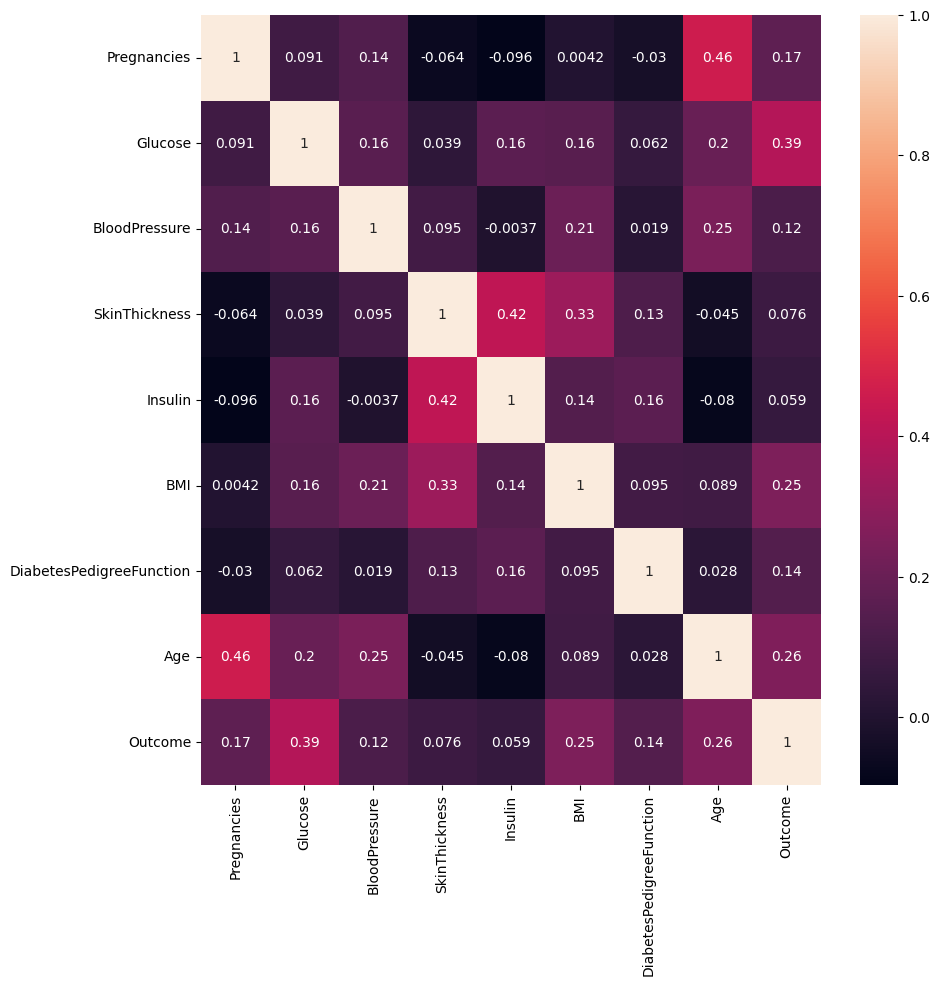

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
cor = datscale.corr(method="kendall")
sns.heatmap(cor, annot=True)
plt.show()

#Split Training Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
# Memisahkan atribut dan target
X = datscale[datat]
y = datscale['Outcome']

# Membagi data menjadi data latih dan data uji
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Membuat objek Decision Tree Classifier
clf = DecisionTreeClassifier()

# Melatih model menggunakan data pelatihan
clf.fit(xTrain, yTrain)

# Prediksi menggunakan data pengujian
yPred = clf.predict(xTest)

# Evaluasi model
accuracy = clf.score(xTest, yTest)
print("Akurasi:", accuracy)

Akurasi: 0.7077922077922078


In [ ]:
# Visualisasi Pohon Keputusan
plt.figure(figsize=(120, 80))
tree.plot_tree(clf, feature_names=datat, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

#Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluasi menggunakan data pengujian
yPred = clf.predict(xTest)

# Menghitung akurasi
accuracy = accuracy_score(yTest, yPred)
print("Akurasi:", accuracy)

# Menghitung presisi
precision = precision_score(yTest, yPred)
print("Presisi:", precision)

# Menghitung recall
recall = recall_score(yTest, yPred)
print("Recall:", recall)

# Menghitung F1-score
f1 = f1_score(yTest, yPred)
print("F1-score:", f1)

Akurasi: 0.7272727272727273
Presisi: 0.5660377358490566
Recall: 0.6122448979591837
F1-score: 0.588235294117647


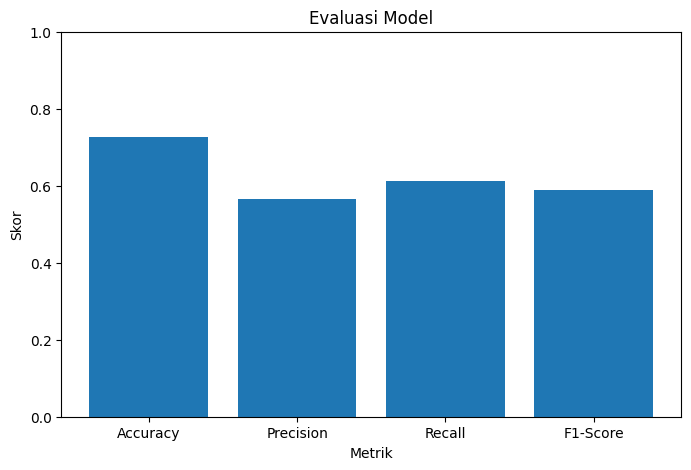

In [ ]:
# Metrik Evaluasi
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy_score(yTest, yPred), precision_score(yTest, yPred),
          recall_score(yTest, yPred), f1_score(yTest, yPred)]

# Plot Evaluasi
plt.figure(figsize=(8, 5))
plt.bar(labels, scores)
plt.ylim([0, 1])
plt.title('Evaluasi Model')
plt.xlabel('Metrik')
plt.ylabel('Skor')
plt.show()